<a href="https://colab.research.google.com/github/sushmanthreddy/GSOC_2023/blob/main/noyebooks/explore_preprocess_cell_tracking_challeneg_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploring cell_tracking_challenge_dataset**

1.   The dataset is sourced from [cell tracking challenge dataset](http://celltrackingchallenge.net/3d-datasets/) the dataset has real and ground truth of image
2.   The following dataset is 3d video dataset in TIF format



In [1]:
#mounting google drive over the colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#adding files to content folder 
!rsync -a /content/drive/MyDrive/my_data/Fluo-N3DH-CE.zip  /content/

In [ ]:
#the command to unzip files from drive
!unzip /content/Fluo-N3DH-CE.zip

In [4]:
#installing simpleITK for handling tif files
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 15.2 MB/s eta 0:00:00


In [5]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import SimpleITK as sitk
import plotly.express as px
import plotly.graph_objects as go

In [6]:
#function to read image files and convert to numpy array
def load_img_from_tiff(path2img):
    img = sitk.ReadImage(path2img)
    img_array = sitk.GetArrayFromImage(img)
    return(img_array)


In [7]:
#function to display batch images loader from dataset
def display_images(images, columns=5, width=20, height=3, max_images=40, label_wrap_length=6, label_font_size=8):

    if len(images) > max_images:
        print(f"Showing {max_images} images of {len(images)}:")
        images=images[0:max_images]

    height = max(height, int(len(images)/columns) * height)
    plt.figure(figsize=(width, height))

    for i, image in enumerate(images):
        plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        plt.imshow(image, cmap='inferno')

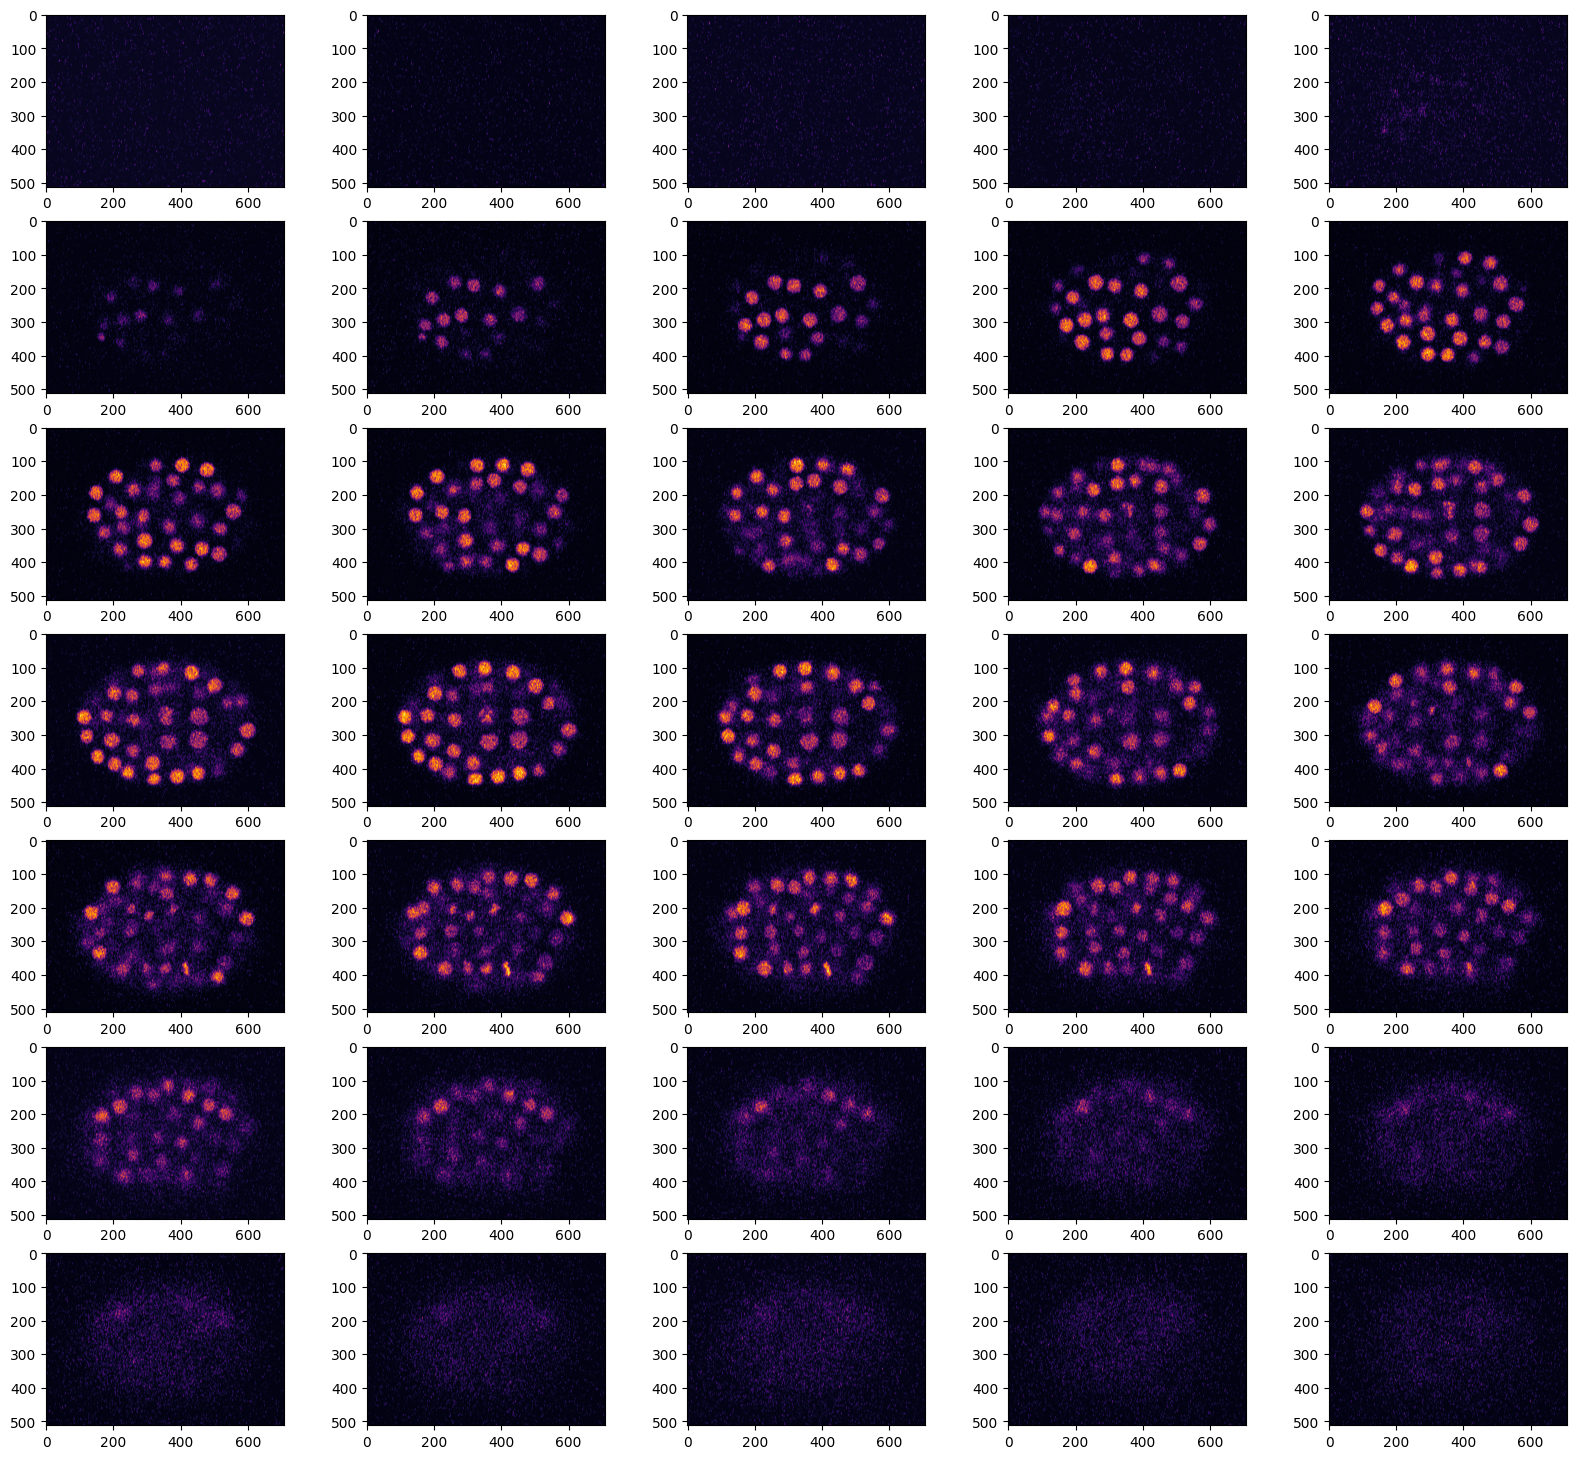

In [8]:
arr_images = load_img_from_tiff("/content/Fluo-N3DH-CE-2/01/t100.tif")
display_images(arr_images)

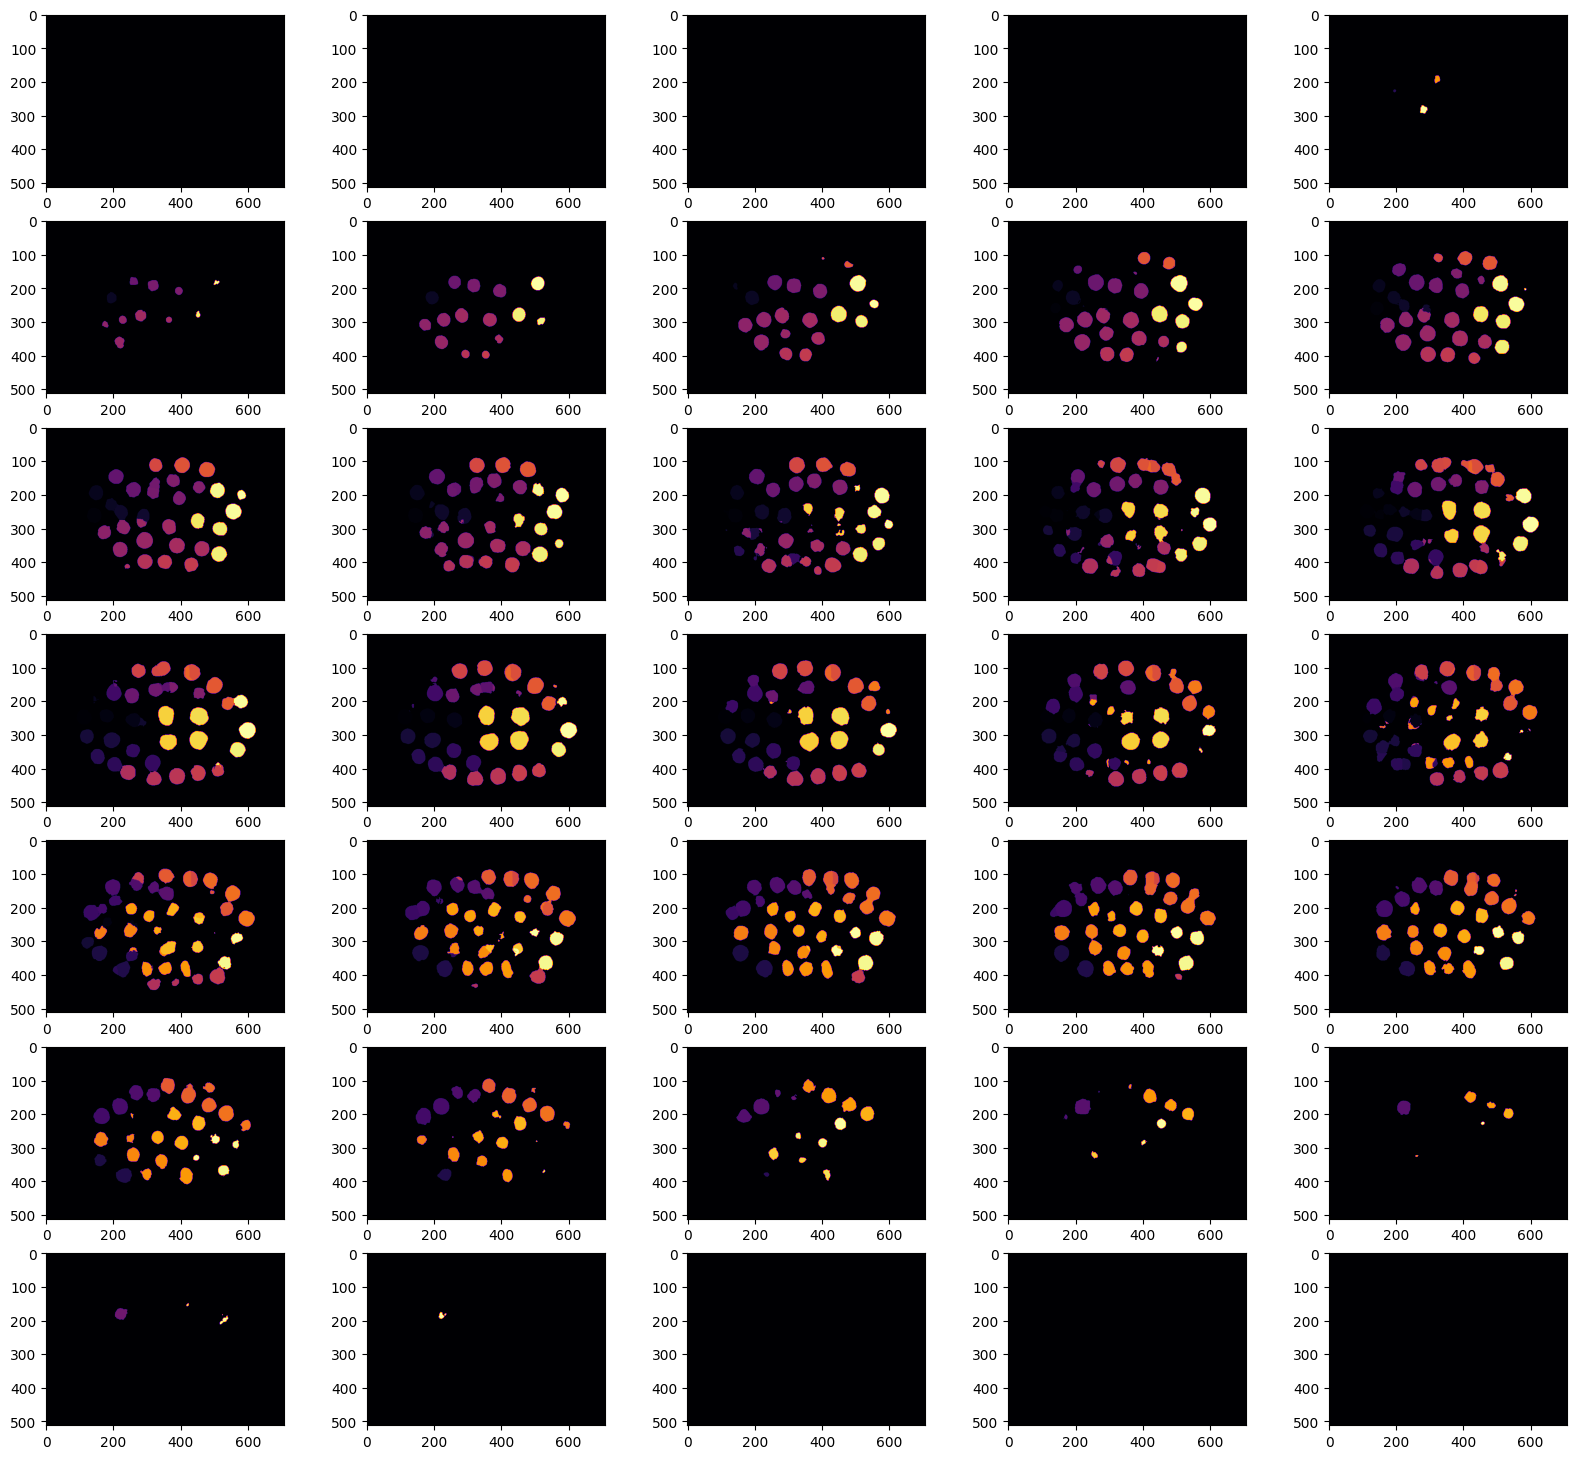

In [9]:
arr_images = load_img_from_tiff("/content/Fluo-N3DH-CE-2/01_ST/SEG/man_seg100.tif")
display_images(arr_images)

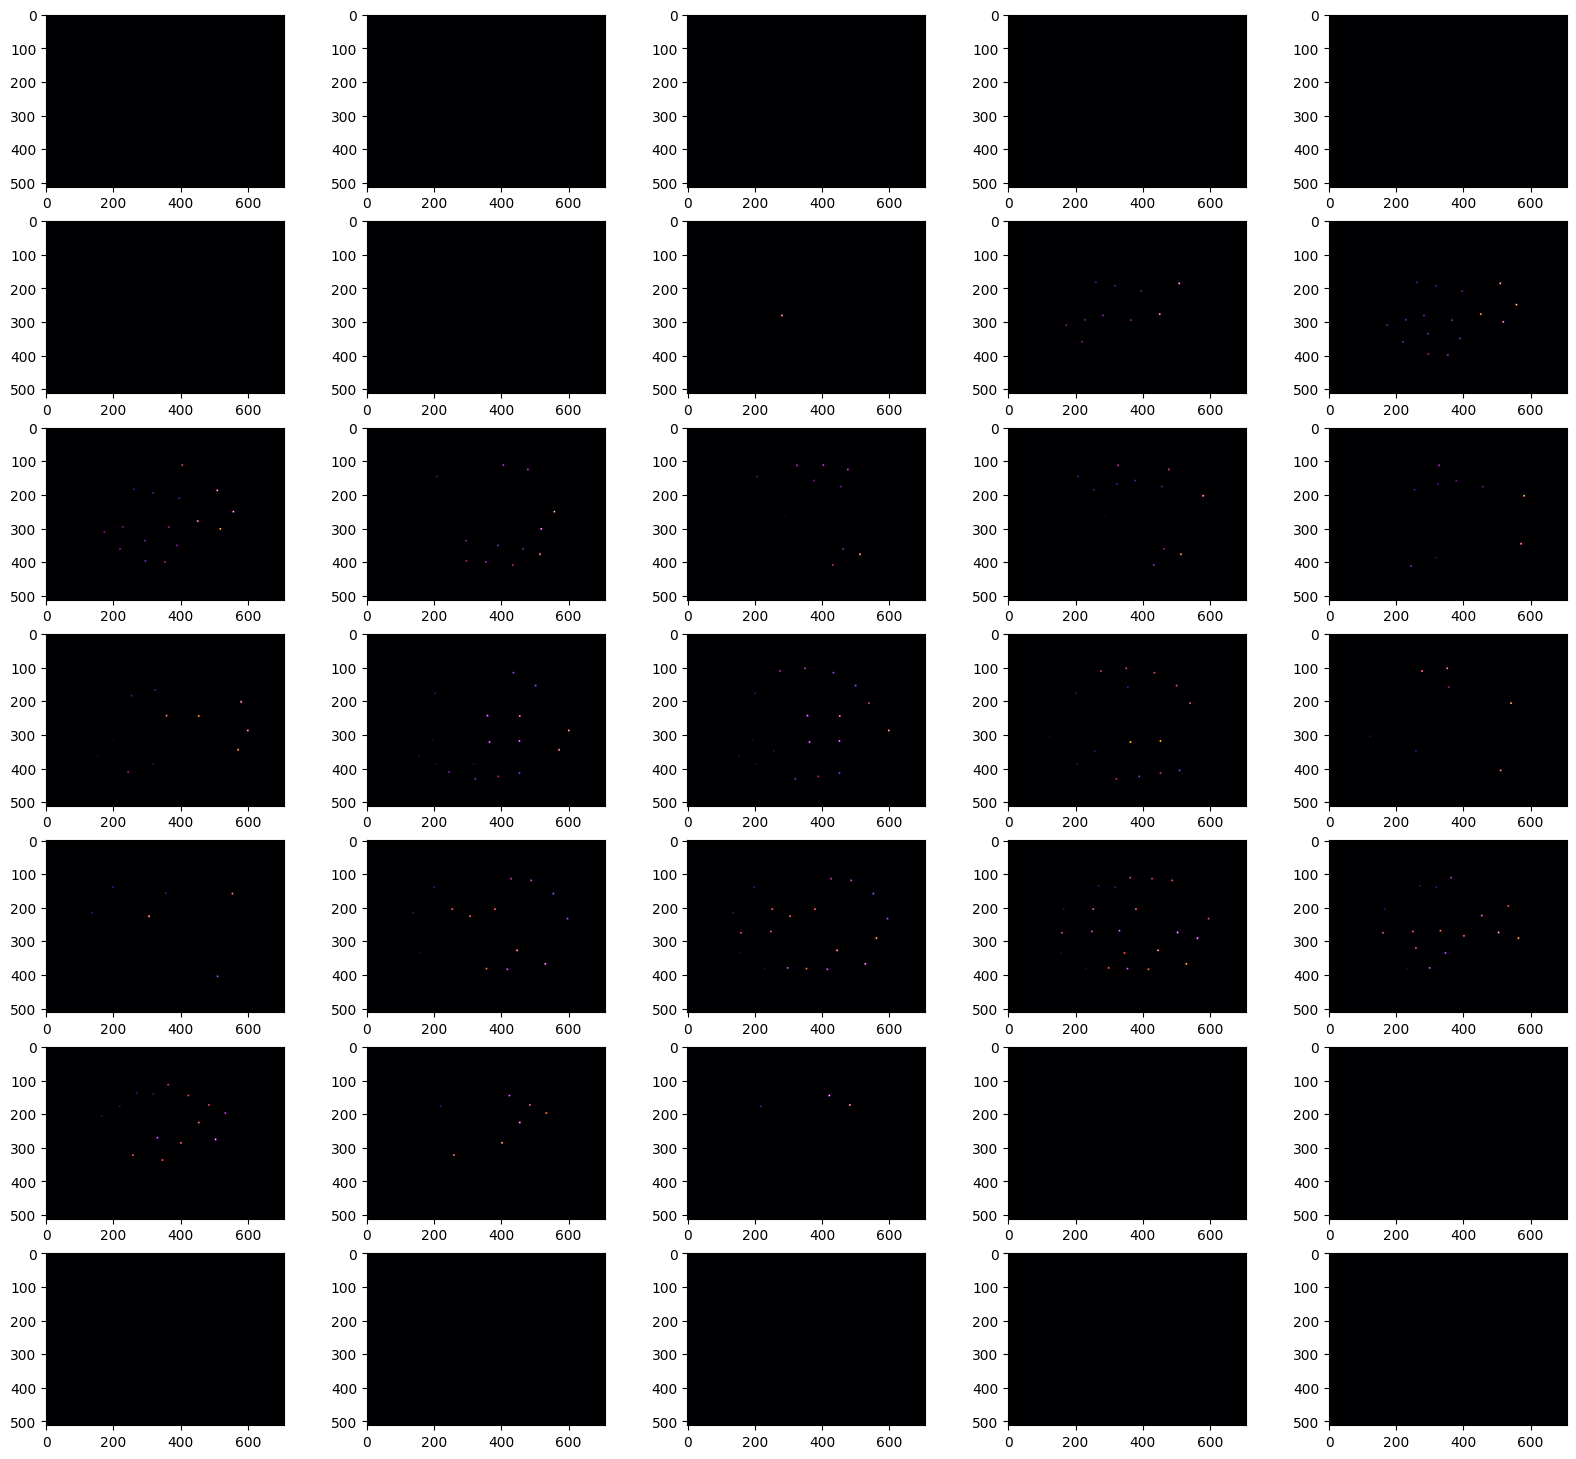

In [10]:
# The images represent the centroid position of nucleus in 3dimesion
arr_images = load_img_from_tiff("/content/Fluo-N3DH-CE-2/01_GT/TRA/man_track100.tif")
display_images(arr_images)

In [11]:
arr_images = load_img_from_tiff("/content/Fluo-N3DH-CE-2/01_GT/SEG/man_seg_028_018.tif")
# display_images(arr_images)
arr_images[0].shape

(708,)

In [12]:
!mkdir features
!mkdir segmentation_maps
!mkdir features_jpeg
!mkdir segmentation_maps_jpeg

In [13]:
from tqdm import tqdm

for t in tqdm(range(194)):
  t3 = f"{t:03}"
  feature_path="/content/Fluo-N3DH-CE-2/01/t"+str(t3)+".tif"
  seg_map_path="/content/Fluo-N3DH-CE-2/01_ST/SEG/man_seg"+str(t3)+".tif"
  features_arr = load_img_from_tiff(feature_path)
  seg_arr = load_img_from_tiff(seg_map_path)
  
  for i in range(len(features_arr)):
    cv2.imwrite('/content/features_jpeg/F'+str(t)+'_'+str(i)+'.jpeg', features_arr[i])
    cv2.imwrite('/content/segmentation_maps_jpeg/L'+str(t)+'_'+str(i)+'.jpeg', seg_arr[i])
    cv2.imwrite('/content/features/F'+str(t)+'_'+str(i)+'.png', features_arr[i])
    cv2.imwrite('/content/segmentation_maps/L'+str(t)+'_'+str(i)+'.png', seg_arr[i])

100%|██████████| 194/194 [02:42<00:00,  1.20it/s]


In [14]:
features_path, label_path, features_path_jpeg, label_path_jpeg = "/content/features/", "/content/segmentation_maps/", "/content/features_jpeg/", "/content/segmentation_maps_jpeg/"

In [15]:
from PIL import Image
import os, sys

def resize(path, mode):
  dirs = os.listdir( path )
  for item in tqdm(dirs):
    if os.path.isfile(path+item):
      im = Image.open(path+item)
      f, e = os.path.splitext(path+item)
      imResize = im.resize((256,256), Image.NEAREST)
      imResize.save(f+e, mode, quality=100)
      
resize(features_path, mode='PNG')
resize(label_path, mode='PNG')
resize(features_path_jpeg, mode='JPEG')
resize(label_path_jpeg, mode='JPEG')


100%|██████████| 6790/6790 [00:15<00:00, 440.69it/s]


In [16]:
z = plt.imread("/content/segmentation_maps_jpeg/L150_25.jpeg")
fig = go.Figure(data=[go.Surface(z=z)])
fig.update_layout(title='PNG', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [17]:
z=plt.imread("/content/segmentation_maps_jpeg/L150_25.jpeg")
fig = go.Figure(data=[go.Surface(z=z)])
fig.update_layout(title='JPEG format', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [21]:
!cp -r /content/features /content/drive/MyDrive/my_data/celltrackingchallenge/
!cp -r /content/segmentation_maps /content/drive/MyDrive/my_data/celltrackingchallenge/

In [19]:
# import imageio
# import matplotlib.pyplot as plt

# def plot_gif(gif_file):
#     # Read the gif file and create a list of frames
#     frames = imageio.mimread(gif_file)

#     # Create a new figure and plot the first frame
#     fig = plt.figure()
#     plt.axis('off')
#     plt.imshow(frames[0])

#     # Create an animation object from the frames and display it in the figure
#     animation = plt.imshow(frames[0])
#     def animate(i):
#         animation.set_data(frames[i])
#         return animation,
#     ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=50, blit=True)

#     # Display the animation
#     plt.show()


In [20]:
# import imageio
# import SimpleITK as sitk

# def load_gif_from_tiff(path_to_tiff):
#     # Load the TIFF video file and create a list of frames
#     img = sitk.ReadImage(path_to_tiff)
#     img_array = sitk.GetArrayFromImage(img)
#     frames = [frame for frame in img_array]

#     # Create a GIF animation from the frames
#     animation = imageio.mimsave('animation.gif', frames, format='gif', fps=30)

#     # Return the GIF animation object
#     return animation
